In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
label_modularity = "Cat3"
model = "LR"

In [3]:
def select_model(model):
    classifier = MultinomialNB()
    if model == "NB":
        classifier = MultinomialNB()
    if model == "SVM":
        classifier = SVC(kernel="linear", random_state=42)
    if model == "RF":
        classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    if model == "KNN":
        classifier = KNeighborsClassifier(n_neighbors=5)
    if model == "LR":
        classifier = LogisticRegression()
        
    return classifier

In [4]:
train_filename = '../2Dataset/train_40k.csv'
validation_filename = '../2Dataset/val_10k.csv'

train_data = pd.read_csv(train_filename)
validation_data = pd.read_csv(validation_filename)

In [5]:
#GET NUMBER OF LABELS
original_labels = train_data[label_modularity].unique().tolist()
num_labels = num_unique_labels = train_data[label_modularity].nunique()
print(num_labels)

464


In [6]:
#Count token time
token_start = time.time()

In [7]:
label_encoder = LabelEncoder()
train_data[label_modularity] = label_encoder.fit_transform(train_data[label_modularity])
labels = train_data[label_modularity].tolist()

validation_data[label_modularity] = label_encoder.fit_transform(validation_data[label_modularity])
val_labels = validation_data[label_modularity].tolist()

In [8]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', lowercase=True)
train_features = vectorizer.fit_transform(train_data['Text'])
validation_features = vectorizer.transform(validation_data['Text'])

In [9]:
token_finish = time.time()

print(token_finish - token_start)

1.622856855392456


In [10]:
train_start = time.time()

In [11]:
# Select any model
classifier = select_model(model)
classifier.fit(train_features, labels)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
train_finish = time.time()

print(train_finish - train_start)

83.77365279197693


In [13]:
val_start = time.time()

In [14]:
val_predictions = classifier.predict(validation_features)
accuracy = accuracy_score(val_labels, val_predictions)
precision = precision_score(val_labels, val_predictions, average='weighted')
recall = recall_score(val_labels, val_predictions, average='weighted')
f1 = f1_score(val_labels, val_predictions, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.0104
Precision: 0.0273
Recall: 0.0104
F1-score: 0.0113


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
val_finish = time.time()

print(val_finish - val_start)

0.13444828987121582


In [16]:
conf_matrix = confusion_matrix(val_labels, val_predictions)

In [17]:
class_accuracy = {}
for i in range(len(label_encoder.classes_)):
    class_name = label_encoder.classes_[i]
    total = conf_matrix[i].sum()
    correct = conf_matrix[i][i]
    accuracy = correct / total if total > 0 else 0.0
    class_accuracy[class_name] = accuracy

In [18]:
# Imprimir el accuracy por clase
sorted_class_accuracy = sorted(class_accuracy.items(), key=lambda x: x[1], reverse=True)

print("Accuracy por clase:")
for class_name, acc in sorted_class_accuracy:
    print(f"{class_name}: {acc}")

# Calcular el accuracy general
accuracy = accuracy_score(val_labels, val_predictions)
print("Accuracy general:", accuracy)

Accuracy por clase:
animals figures: 0.4748201438848921
apparel accessories: 0.34375
accessories: 0.1891891891891892
adult toys games: 0.08163265306122448
alternative medicine: 0.06756756756756757
highchairs booster seats: 0.05
allergy: 0.038461538461538464
unknown: 0.01642710472279261
face: 0.003816793893129771
action toy figures: 0.0
activity centers entertainers: 0.0
activity play centers: 0.0
air fresheners: 0.0
albums: 0.0
aprons smocks: 0.0
aquarium d cor: 0.0
aquarium heaters: 0.0
aquarium hoods: 0.0
aquarium lights: 0.0
aquarium starter kits: 0.0
aquariums: 0.0
automatic feeders: 0.0
baby formula: 0.0
baby gyms playmats: 0.0
baby seats: 0.0
backpacks carriers: 0.0
bags cases: 0.0
baking mixes: 0.0
ball pits accessories: 0.0
balls: 0.0
bars: 0.0
basic life skills toys: 0.0
bath: 0.0
bath toys: 0.0
bathing accessories: 0.0
bathing tubs seats: 0.0
bathroom aids safety: 0.0
bathroom safety: 0.0
battling tops: 0.0
beanbags foot bags: 0.0
beauty fashion: 0.0
bedding: 0.0
beds accesso

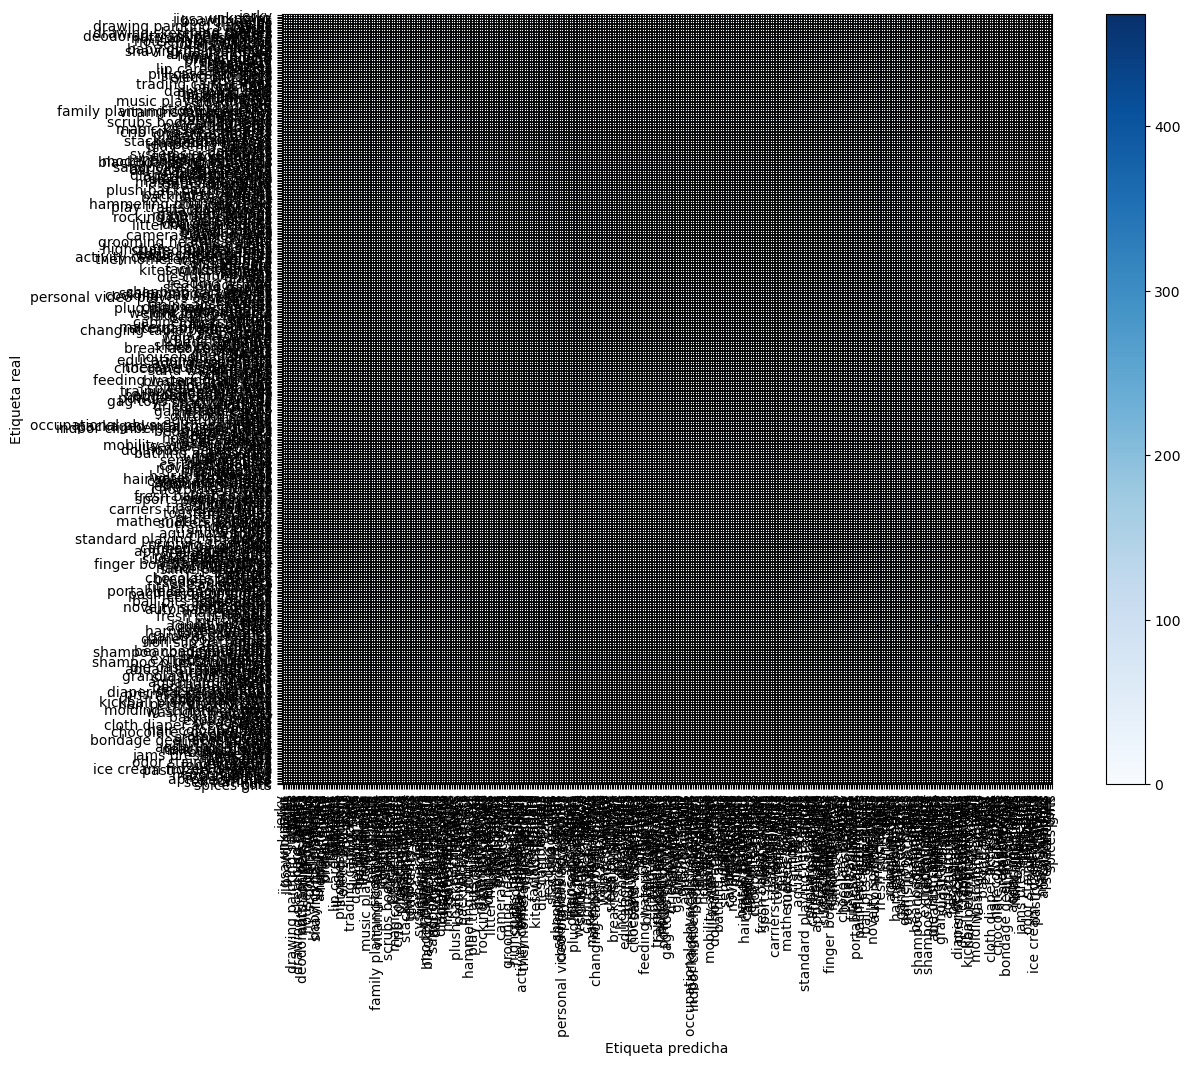

In [19]:
normalize=False
cmap=plt.cm.Blues

plt.figure(figsize=(14, 10))
plt.title("")

plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(num_labels)
plt.xticks(tick_marks, original_labels, rotation=90)
plt.yticks(tick_marks, original_labels)

for i in range(num_labels):
        for j in range(num_labels):
            plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color='black', fill=None, linewidth=0.5))

plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.show()